In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
mushrooms = pd.read_csv('mushrooms.csv')

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
mushrooms.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,e,e,s,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,s,m


In [5]:
mushrooms.shape

(8124, 23)

In [6]:
 mushrooms = mushrooms.astype('category')

In [7]:
mushrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   class                     8124 non-null   category
 1   cap-shape                 8124 non-null   category
 2   cap-surface               8124 non-null   category
 3   cap-color                 8124 non-null   category
 4   bruises                   8124 non-null   category
 5   odor                      8124 non-null   category
 6   gill-attachment           8124 non-null   category
 7   gill-spacing              8124 non-null   category
 8   gill-size                 8124 non-null   category
 9   gill-color                8124 non-null   category
 10  stalk-shape               8124 non-null   category
 11  stalk-root                8124 non-null   category
 12  stalk-surface-above-ring  8124 non-null   category
 13  stalk-surface-below-ring  8124 non-null   catego

In [8]:
mushrooms.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [9]:
mushrooms.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [10]:
le = LabelEncoder()
for column in mushrooms.columns:
    mushrooms[column]=le.fit_transform(mushrooms[column])

In [11]:
mushrooms['veil-type']

0       0
1       0
2       0
3       0
4       0
       ..
8119    0
8120    0
8121    0
8122    0
8123    0
Name: veil-type, Length: 8124, dtype: int32

In [12]:
mushrooms=mushrooms.drop(["veil-type"], axis=1)

In [13]:
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,2,1,0,3,0,1


In [14]:
x = mushrooms.drop('class',axis=1)
y = mushrooms['class']

In [15]:
x

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,0,2,2,5,5,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,0,2,2,5,5,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,0,2,2,5,5,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,0,2,1,7,7,2,1,0,7,4,2


In [16]:
y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int32

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [18]:
x_train

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
7873,3,2,2,0,7,1,0,1,0,1,0,2,1,6,7,2,1,0,7,4,0
6515,5,2,4,0,2,1,0,1,0,1,0,1,2,7,7,2,1,0,7,4,4
6141,2,3,2,0,8,1,0,1,0,1,0,2,2,6,7,2,1,0,7,4,2
2764,2,0,4,1,5,1,0,0,9,1,1,2,2,3,6,2,1,4,3,4,0
438,0,3,9,1,3,1,0,0,4,0,2,2,2,7,7,2,1,4,3,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5226,5,3,4,0,2,1,0,1,0,1,0,1,2,6,7,2,1,0,7,4,4
5390,3,3,2,1,5,1,0,0,10,0,0,2,2,7,2,2,2,0,7,1,6
860,2,3,4,1,3,1,0,0,10,0,4,2,3,7,7,2,1,4,3,5,4
7603,3,2,2,0,2,1,0,1,0,1,0,2,2,6,6,2,1,0,7,4,4


In [19]:
y_train

7873    1
6515    1
6141    1
2764    0
438     0
       ..
5226    1
5390    0
860     0
7603    1
7270    0
Name: class, Length: 6499, dtype: int32

In [20]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

svc = SVC()
svc.fit(x_train,y_train)

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

rf = RandomForestClassifier()
rf.fit(x_train,y_train)

gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [21]:
y_pred1 = lr.predict(x_test)

y_pred2 = knn.predict(x_test)

y_pred3 = svc.predict(x_test)

y_pred4 = dt.predict(x_test)

y_pred5 = rf.predict(x_test)

y_pred6 = gb.predict(x_test)

In [22]:
print('ACC LR',accuracy_score(y_test,y_pred1))
print('ACC KNN',accuracy_score(y_test,y_pred2))
print('ACC SVC',accuracy_score(y_test,y_pred3))
print('ACC DT',accuracy_score(y_test,y_pred4))
print('ACC RF',accuracy_score(y_test,y_pred5))
print('ACC GB',accuracy_score(y_test,y_pred6))

ACC LR 0.947076923076923
ACC KNN 0.9963076923076923
ACC SVC 0.9938461538461538
ACC DT 1.0
ACC RF 1.0
ACC GB 1.0


In [23]:
final_data = pd.DataFrame({'Models':['LR','KNN','SVC','DT','RF','GB'],
             'ACC':[accuracy_score(y_test,y_pred1)*100,
                   accuracy_score(y_test,y_pred2)*100,
                   accuracy_score(y_test,y_pred3)*100,
                   accuracy_score(y_test,y_pred4)*100,
                   accuracy_score(y_test,y_pred5)*100,
                   accuracy_score(y_test,y_pred6)*100]})

In [24]:
final_data

,Models,ACC
0,LR,94.707692
1,KNN,99.630769
2,SVC,99.384615
3,DT,100.000000
4,RF,100.000000
5,GB,100.000000


In [25]:
sns.barplot(final_data['Models'],final_data['ACC'])

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

In [26]:
rf_model = RandomForestClassifier()
rf_model.fit(x,y)

RandomForestClassifier()

In [27]:
rf.feature_importances_

array([0.00443943, 0.01225957, 0.01485861, 0.05700887, 0.15121385,
       0.0025082 , 0.03099442, 0.11391194, 0.09993986, 0.03347842,
       0.07750425, 0.04766317, 0.04024198, 0.01947699, 0.00983303,
       0.0013626 , 0.01849904, 0.07831947, 0.10483668, 0.04904707,
       0.03260257])

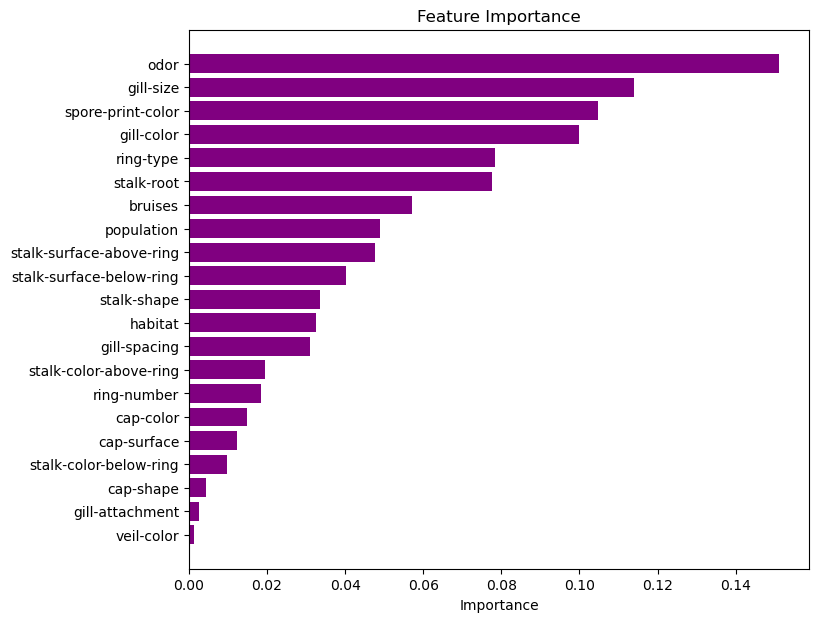

In [28]:
features_list = x.columns.values
feature_importance = rf.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(8,7))

plt.barh(range(len(sorted_idx)),feature_importance[sorted_idx], align='center', color='purple')
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

In [29]:
import pickle

In [30]:
filename = 'my model.sav'

In [31]:
pickle.dump(rf, open(filename, 'wb'))

In [32]:
loded_model = pickle.load(open('my Model.sav', 'rb'))

In [33]:
p = loded_model.predict([[5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,2,1,4,3,2,1]])

if p[0]==1:
    print("Poisonous")
else:
    print('edible')

edible
